In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import joblib
import pickle
from joblib import Parallel, delayed
from keras.utils import plot_model
from keras import models, layers
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support

In [2]:
df = pd.read_csv("./sqliv2.csv", encoding='utf-16')
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (33761, 2)


,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
5,select * from users where id = '1' or @ @1 = ...,1
6,"select * from users where id = 1 or 1#"" ( un...",1
7,' select name from syscolumns where id = ( ...,1
8,select * from users where id = 1 +$+ or 1 = 1...,1
9,"1; ( load_file ( char ( 47,101,116,99,47,112,9...",1


In [3]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(33761,) (33761,)
Dataset Input: 
 0                                                  NaN
1                        " or pg_sleep ( __TIME__ ) --
2    create user name identified by pass123 tempora...
3                                                  %29
4    ' AND 1 = utl_inaddr.get_host_address  (  (  S...
Name: Sentence, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64


In [4]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to C:\Users\Hema
[nltk_data]     InduKan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27008, 10321)
(27008,)
(6753, 10321)
(6753,)


In [6]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

In [7]:
lr_clf = LogisticRegression()
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

Accuracy of Logistic Regression on test set : 0.9582407818747224
F1 Score of Logistic Regression on test set : 0.9359673024523162


In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

In [17]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.8047619047619048
F1 Score of SVM on test set : 0.39705882352941174


In [29]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.5944024877832075
F1 Score of Naive Bayes on test set : 0.6255639097744361


In [19]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.8547619047619047
F1 Score of Naive Bayes on test set : 0.7813620071684588


In [22]:
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 4717)
X_test1 = X_test.reshape(-1, 1, 4717)

history = model.fit(X_train1, y_train, epochs = 10, validation_data = (X_test1, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             150976    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 152,065
Trainable params: 152,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
105/105 [==============================] - 9s 8ms/step - loss: 0.4432 - accuracy: 0.8167 - val_loss: 0.2031 - val_accuracy: 0.9000
Epoch 2/10
105/105 [====================

In [24]:
y_pred = model.predict(X_test1).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)

27/27 [==============================] - 0s 7ms/step
Accuracy of CNN on test set : 0.9738095238095238
F1 Score of CNN on test set : 0.9519650655021834


In [25]:
plot_model(model, show_shapes=True, to_file='CNN.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


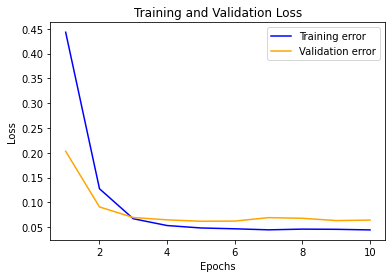

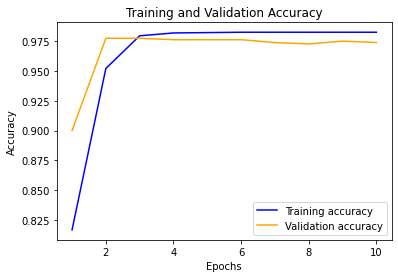

In [26]:
# Plots loss over epochs
plot_history(history)
plot_historyAcc(history)

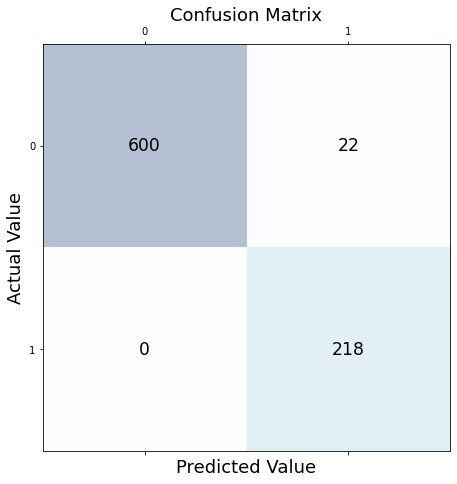

               precision    recall  f1-score   support

Non-Intrusion       1.00      0.96      0.98       622
    Intrusion       0.91      1.00      0.95       218

     accuracy                           0.97       840
    macro avg       0.95      0.98      0.97       840
 weighted avg       0.98      0.97      0.97       840



In [27]:
# Plots confusion matrix and displays classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix_model)
print(classification_report(y_test, y_pred, target_names=["Non-Intrusion", "Intrusion"]))

In [28]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
data

,LogisticRegression,RandomForest,SVM,NaiveBayes,DecisionTree,CNN
F1_Score,0.860104,0.835249,0.397059,0.953642,0.781362,0.951965
Precision,0.761468,1.000000,0.247706,0.990826,1.000000,1.000000
Recall,0.988095,0.717105,1.000000,0.919149,0.641176,0.908333
Accuracy,0.935714,0.897619,0.804762,0.975000,0.854762,0.973810


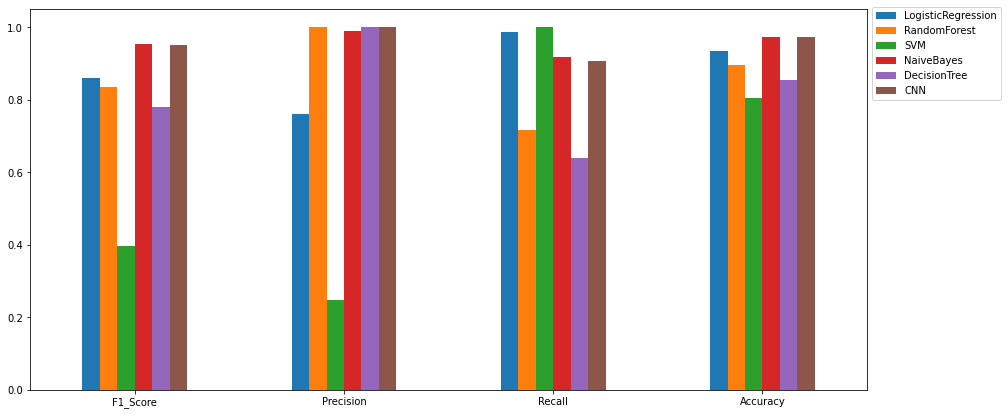

In [29]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7))
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [32]:
joblib.dump(nb_clf, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [87]:
sql = str("1=1") + str("1=1")
data = dict(Sentence=sql)
x_val = pd.DataFrame(data, index=[0])

In [88]:
x_val_arr = vectorizer.transform(x_val.values.ravel()).toarray()
x_val_arr

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
nb_clf.predict(x_val_arr)[0]

1

In [81]:
sql = "aspru Asp@2001"
data = dict(Sentence=sql)
x_val = pd.DataFrame(data, index=[0])

In [82]:
x_val_arr = vectorizer.transform(x_val.values.ravel()).toarray()
x_val_arr

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
nb_clf.predict(x_val_arr)[0]

0

In [ ]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [3]:
nb_model = joblib.load("./naive_bayes_model.pkl")
vectorizer = pickle.load(open("./vectorizer.pickle", "rb"))

In [9]:
sql_1 = "SELECT * FROM Users WHERE username = 'Pruthiev' AND id = 'SrKr%4141!'"
data_1 = dict(Sentence=sql_1)
x_val_1 = pd.DataFrame(data_1, index=[0])
sql_arr_1 = vectorizer.transform(x_val_1.values.ravel()).toarray()

In [14]:
sql_2 = "SELECT * FROM Users WHERE ID = '1=1 or' AND id = '1=1'"
data_2 = dict(Sentence=sql_2)
x_val_2 = pd.DataFrame(data_2, index=[0])
sql_arr_2 = vectorizer.transform(x_val_2.values.ravel()).toarray()

In [15]:
sql_3 = "Pruthiev SrKr%4141!"
data_3 = dict(Sentence=sql_3)
x_val_3 = pd.DataFrame(data_3, index=[0])
sql_arr_3 = vectorizer.transform(x_val_3.values.ravel()).toarray()

In [31]:
sql_4 = "? or 1=1--"
data_4 = dict(Sentence=sql_4)
x_val_4 = pd.DataFrame(data_4, index=[0])
sql_arr_4 = vectorizer.transform(x_val_4.values.ravel()).toarray()
x_val_4

,Sentence
0,? or 1=1--


In [30]:
lr_clf.predict(sql_arr_1)[0], lr_clf.predict(sql_arr_2)[0], lr_clf.predict(sql_arr_3)[0], lr_clf.predict(sql_arr_4)[0]

(1, 1, 0, 0)